In [1]:
from astropy.io import fits
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
from importlib import reload
from utils import ks2_utils, shared_utils

In [4]:
import re

In [5]:
reload(ks2_utils)

<module 'utils.ks2_utils' from '/user/jaguilar/tr14/code/utils/ks2_utils.py'>

# INPUT.KS2

In [6]:
#%run utils/ks2_utils.py

In [7]:
ks2_filtermapper = ks2_utils.get_filter_mapper()

In [8]:
ks2_filemapper = ks2_utils.get_file_mapper()

# LOGR.XYVIQ1

LOGR.XYVIQ1 gives the average position for each source on the master frame (cols 1 and 2), the average flux (cols 5 and 11), the flux sigma (cols 6 and 12), and fit quality (cols 7 and 13) in each filter)


In [9]:
reload(ks2_utils)

<module 'utils.ks2_utils' from '/user/jaguilar/tr14/code/utils/ks2_utils.py'>

In [10]:
master_catalog_df = ks2_utils.get_master_catalog()

In [11]:
master_catalog_df

,master_x,master_y,astro_obj_id,master_counts_f1,master_e_counts_f1,master_quality_f1,master_counts_f2,master_e_counts_f2,master_quality_f2
0,736.37,91.51,R0000001,8.352,2.586,0.900,14.088,1.538,0.963
1,737.04,34.36,R0000002,20.458,2.260,0.899,9.987,2.508,0.909
2,740.65,61.26,R0000003,243.655,3.332,0.999,177.850,2.386,0.999
3,745.91,93.19,R0000004,15.340,1.092,0.968,19.786,2.601,0.982
4,749.93,124.75,R0000005,61.959,3.305,0.997,84.200,2.850,0.998
...,...,...,...,...,...,...,...,...,...
6547,1143.99,1583.77,R0006548,144.513,4.771,0.999,238.141,3.876,0.999
6548,1141.30,1589.14,R0006549,581.387,9.779,0.999,562.474,16.677,0.999
6549,1100.46,1608.42,R0006550,2.550,1.864,0.703,5.238,2.821,0.781
6550,1112.54,1627.43,R0006551,0.000,99999.000,0.000,1.667,3.399,0.447


# LOGR.FIND_NIMFO


In [12]:
reload(ks2_utils)
point_sources_df = ks2_utils.get_point_source_catalog()

In [13]:
point_sources_df

,x_flt,y_flt,astro_obj_id,file_id,filter_id,file_ext_id
0,316.835,85.725,R0000001,G004,F1,1
1,316.715,86.255,R0000001,G006,F1,1
2,317.050,86.445,R0000001,G007,F1,1
3,317.165,85.900,R0000001,G009,F1,1
4,316.960,85.430,R0000001,G010,F1,1
...,...,...,...,...,...,...
204678,968.450,978.990,R0006552,G043,F2,1
204679,968.660,979.655,R0006552,G047,F2,1
204680,968.280,979.530,R0006552,G048,F2,1
204681,968.260,977.825,R0006552,G049,F2,1


# Diagnostic plots

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [15]:
ks2_filtermapper.query('filter_id == "F1"')['filter_name'].values[0]

'F127M'

## Quality vs flux

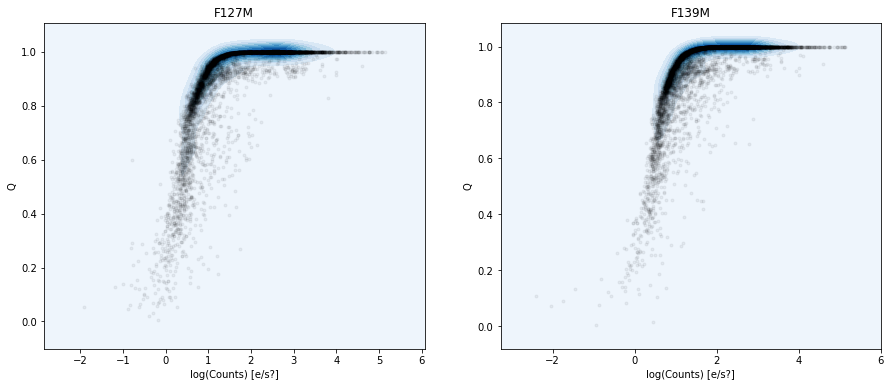

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

format_kwds = {'cmap': mpl.cm.Blues,
               'shade': True,
               'cbar': False,
               'cut': 5}
ax = axes[0]
filter_name = ks2_filtermapper.query('filter_id == "F1"')['filter_name'].values[0]
ax.set_title(f"{filter_name}")
data = master_catalog_df.query("master_counts_f1 > 0 and master_quality_f1 > 0")
sns.kdeplot(np.log10(data['master_counts_f1']), 
            data['master_quality_f1'], 
            ax=ax,
            **format_kwds)
ax.scatter(np.log10(data['master_counts_f1']), 
           data['master_quality_f1'], 
           marker='.', alpha=0.05, c='k')



ax = axes[1]
filter_name = ks2_filtermapper.query('filter_id == "F2"')['filter_name'].values[0]
ax.set_title(f"{filter_name}")
data = master_catalog_df.query("master_counts_f2 > 0")
sns.kdeplot(np.log10(data['master_counts_f2']), 
            data['master_quality_f2'], 
            ax=ax,
            **format_kwds)
ax.scatter(np.log10(data['master_counts_f2']), 
           data['master_quality_f2'], 
           marker='.', alpha=0.05, c='k')

for ax in axes:
    ax.set_xlabel("log(Counts) [e/s?]")
    ax.set_ylabel("Q")

## Plot some bright stars

In [114]:
# find the brightest stars
start = 0
end = start + 9
brightest_stars = master_catalog_df.sort_values(by='master_counts_f1', ascending=False).reset_index(drop=True).loc[start:end].reset_index(drop=True)

In [115]:
brightest_stars

,master_x,master_y,astro_obj_id,master_counts_f1,master_e_counts_f1,master_quality_f1,master_counts_f2,master_e_counts_f2,master_quality_f2
0,890.33,886.85,R0003688,138911.141,681.767,0.999,138139.625,2132.587,0.999
1,946.98,1326.65,R0005481,116826.969,9999.900,1.000,114944.219,2783.895,1.000
2,699.97,452.63,R0001217,115947.625,9999.900,1.000,105570.305,1779.096,0.999
3,796.43,642.13,R0002206,109132.336,1475.222,0.998,111699.477,9273.528,0.999
4,991.21,734.01,R0002481,96826.672,1409.509,0.999,91708.797,2146.511,0.999
5,761.72,306.59,R0000819,90982.305,1617.922,1.000,87717.398,1780.913,0.999
6,761.72,306.59,R0000818,90982.305,1617.922,1.000,87717.398,1780.913,0.999
7,528.05,531.39,R0001562,85158.953,501.723,0.999,85092.359,1451.608,0.999
8,1475.58,850.60,R0003359,70668.305,1027.595,0.999,74035.383,1062.612,0.999
9,287.61,1609.89,R0006495,61282.012,577.044,0.999,104651.070,1997.033,0.999


In [116]:
brightest_stars.loc[0, 'astro_obj_id']

'R0003688'

In [117]:
# # OK, now find the point sources corresponding to each star
# star_ind = 0
# target_star = brightest_stars.loc[star_ind, 'astro_obj_id']
# ps = point_sources_df.query(f"astro_obj_id == '{target_star}'").reset_index(drop=True)
# ps

In [118]:
# # OK, now for each row, plot the image and x,y
# ncols = 3
# nrows = (len(ps)//ncols) + int(bool((len(ps)%ncols)))
# fig, axes = plt.subplots(ncols, nrows, figsize=(6*ncols, 4*nrows))
# imshow_args = {'origin':'lower', 
#                'cmap':'magma', 
#                'norm': mpl.colors.LogNorm()}
# for i, row in ps.iterrows():
#     ax = axes.ravel()[i]
#     # find the file and get the data
#     file_name = ks2_filemapper.query(f"file_id == '{row.file_id}'")['file_name'].values[0]
#     file_name = shared_utils.data_path / file_name
#     data = fits.getdata(file_name, 'SCI')
    
#     ax.imshow(data, **imshow_args)
#     ax.scatter(*row[['x_flt','y_flt']], marker='o', s=200, ec='w', fc='none')
# fig.suptitle(f"Star ID: {target_star}")
# fig.tight_layout(rect=[0, 0, 1, 0.97])

In [119]:
# # OK, now find the point sources corresponding to each star
# star_ind = 0
# target_star = brightest_stars.loc[star_ind, 'astro_obj_id']
# ps = point_sources_df.query(f"astro_obj_id == '{target_star}'").reset_index(drop=True)

# # common formatting
# imshow_args = {'cmap':'magma', 
#                'norm': mpl.colors.LogNorm()}

# fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# fig.suptitle(f"Star ID: {target_star}", y=0.75)
# # fig.tight_layout()#rect=[0, 0, 1, 0.97])

# row = ps.loc[0]
# # find the file and get the data
# file_name = ks2_filemapper.query(f"file_id == '{row.file_id}'")['file_name'].values[0]
# file_name = shared_utils.data_path / file_name
# data = fits.getdata(file_name, 'SCI')

# # plot the full-frame image
# ax = axes[0]
# ax.pcolormesh(data, **imshow_args)
# ax.scatter(*row[['x_flt','y_flt']], 
#            marker='o', s=200, ec='w', fc='none')
# ax.set_aspect('equal')

# # zoom in on the star
# ax = axes[1]
# # cut out a 15x15 stamp
# stamp_size = np.array([-10, 11])
# data_range = [np.int(np.floor(row['x_flt'])) + stamp_size,
#               np.int(np.floor(row['y_flt'])) + stamp_size]
# stamp = data[data_range[1][0]:data_range[1][1], data_range[0][0]:data_range[0][1]]
# ax.pcolor(np.arange(*data_range[0]), 
#           np.arange(*data_range[1]),
#           stamp,
#           **imshow_args)
# ax.scatter(*row[['x_flt','y_flt']]-0.5, 
#            marker='o', s=400, ec='k', fc='none')
# ax.scatter(*row[['x_flt','y_flt']]-0.5, 
#            marker='o', s=50, fc='k', ec='none')
# ax.set_aspect('equal')



In [120]:
# plot the brightest stars all on the same full-field image, then the 10 brightest as stamps
# fig, ax = plt.subplots(1, 1)
# find a file that they all have in common
brightest_stars

,master_x,master_y,astro_obj_id,master_counts_f1,master_e_counts_f1,master_quality_f1,master_counts_f2,master_e_counts_f2,master_quality_f2
0,890.33,886.85,R0003688,138911.141,681.767,0.999,138139.625,2132.587,0.999
1,946.98,1326.65,R0005481,116826.969,9999.900,1.000,114944.219,2783.895,1.000
2,699.97,452.63,R0001217,115947.625,9999.900,1.000,105570.305,1779.096,0.999
3,796.43,642.13,R0002206,109132.336,1475.222,0.998,111699.477,9273.528,0.999
4,991.21,734.01,R0002481,96826.672,1409.509,0.999,91708.797,2146.511,0.999
5,761.72,306.59,R0000819,90982.305,1617.922,1.000,87717.398,1780.913,0.999
6,761.72,306.59,R0000818,90982.305,1617.922,1.000,87717.398,1780.913,0.999
7,528.05,531.39,R0001562,85158.953,501.723,0.999,85092.359,1451.608,0.999
8,1475.58,850.60,R0003359,70668.305,1027.595,0.999,74035.383,1062.612,0.999
9,287.61,1609.89,R0006495,61282.012,577.044,0.999,104651.070,1997.033,0.999


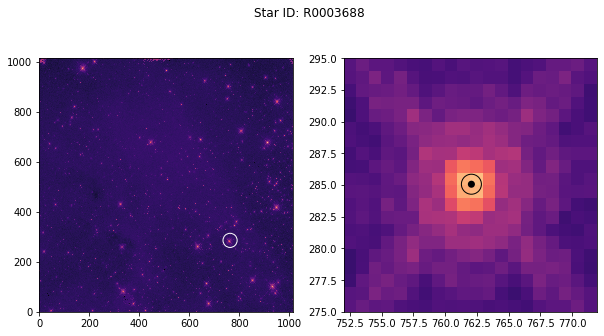

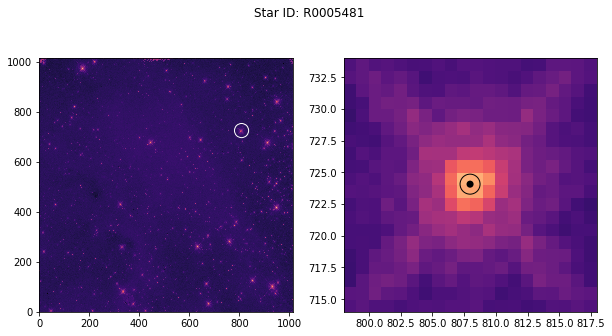

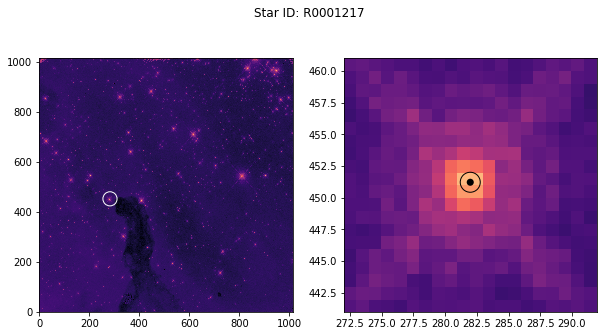

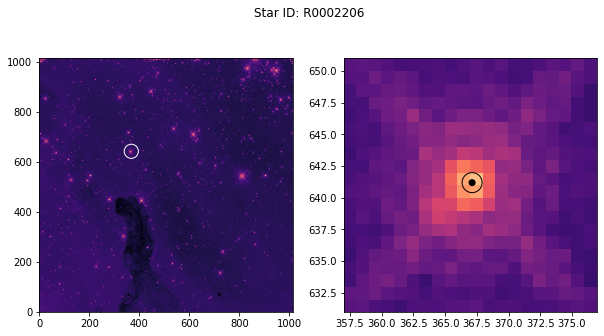

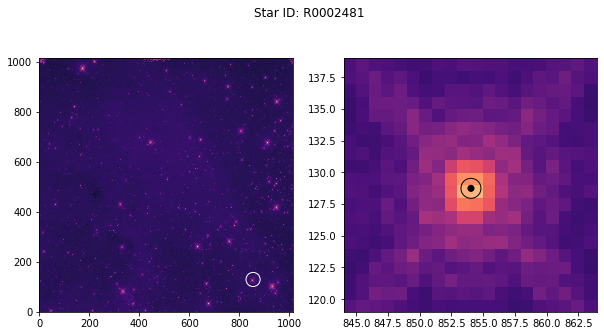

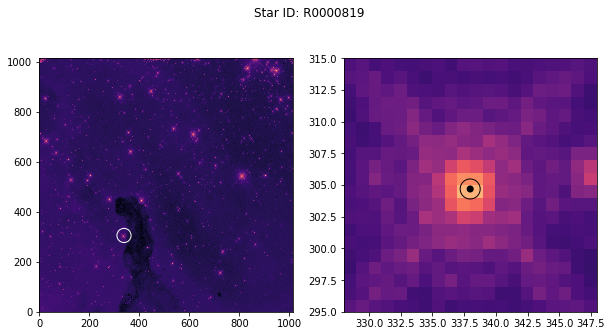

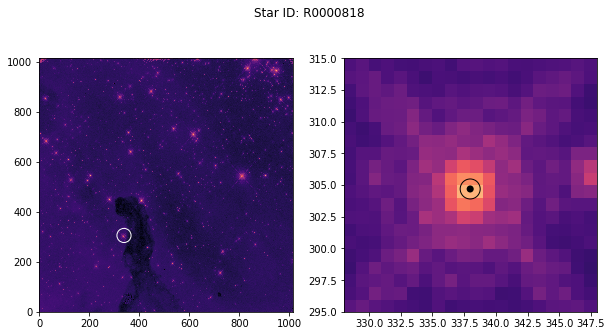

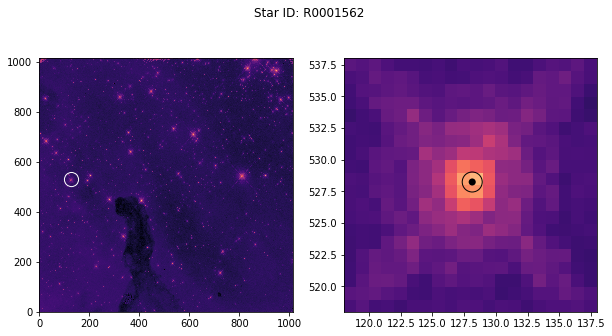

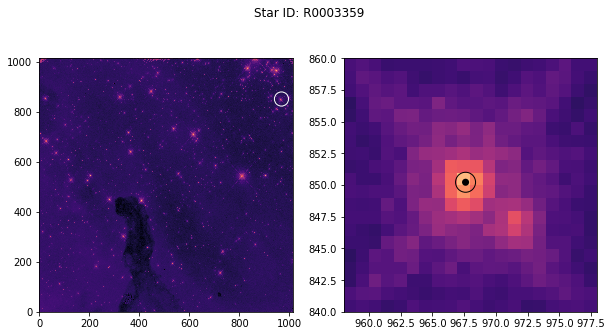

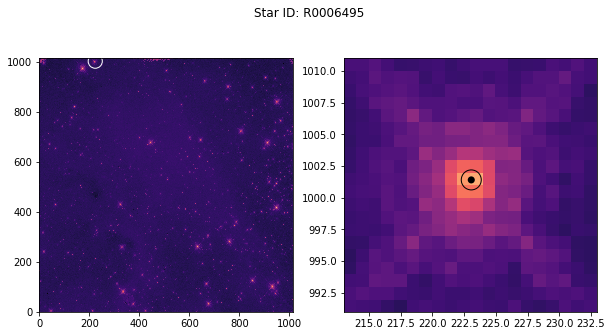

In [124]:
# OK, now find the point sources corresponding to each star
for star_ind in brightest_stars.index:
    target_star = brightest_stars.loc[star_ind, 'astro_obj_id']
    ps = point_sources_df.query(f"astro_obj_id == '{target_star}' and filter_id == 'F1'").reset_index(drop=True)

    # common formatting
    imshow_args = {'cmap':'magma', 
                   'norm': mpl.colors.LogNorm(vmin=1, vmax=brightest_stars['master_counts_f1'].max())}

    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    fig.suptitle(f"Star ID: {target_star}", y=0.75)
    # fig.tight_layout()#rect=[0, 0, 1, 0.97])

    row = ps.loc[0]
    # find the file and get the data
    file_name = ks2_filemapper.query(f"file_id == '{row.file_id}'")['file_name'].values[0]
    file_name = shared_utils.data_path / file_name
    data = fits.getdata(file_name, 'SCI')

    # plot the full-frame image
    ax = axes[0]
    ax.pcolormesh(data, **imshow_args)
    ax.scatter(*row[['x_flt','y_flt']], 
               marker='o', s=200, ec='w', fc='none')
    ax.set_aspect('equal')
    ax.set_xlim(0, data.shape[1])
    ax.set_ylim(0, data.shape[0])

    # zoom in on the star
    ax = axes[1]
    # cut out a 15x15 stamp
    stamp_size = np.array([-10, 11])
    data_range = [np.int(np.floor(row['x_flt'])) + stamp_size,
                  np.int(np.floor(row['y_flt'])) + stamp_size]
    stamp = data[data_range[1][0]:data_range[1][1], data_range[0][0]:data_range[0][1]]
    ax.pcolor(np.arange(*data_range[0]), 
              np.arange(*data_range[1]),
              stamp,
              **imshow_args)
    ax.scatter(*row[['x_flt','y_flt']]-0.5, 
               marker='o', s=400, ec='k', fc='none')
    ax.scatter(*row[['x_flt','y_flt']]-0.5, 
               marker='o', s=50, fc='k', ec='none')
    ax.set_aspect('equal')
    if False:
        fig.savefig(f"./figs/ks2_centering_test-{star_ind+1:04d}.png", bbox_inches='tight')


In [122]:
ps

,x_flt,y_flt,astro_obj_id,file_id,filter_id,file_ext_id
0,223.560,1001.900,R0006495,G001,F1,1
1,223.265,1002.880,R0006495,G002,F1,1
2,223.725,1003.020,R0006495,G003,F1,1
3,223.460,1002.355,R0006495,G005,F1,1
4,223.920,1002.595,R0006495,G008,F1,1
5,224.355,1002.735,R0006495,G011,F1,1
6,222.965,1001.545,R0006495,G013,F1,1
7,224.030,1002.070,R0006495,G015,F1,1
8,224.200,1003.210,R0006495,G017,F1,1


In [123]:
# for star_ind in brightest_stars.index[3:5]:
#     target_star = brightest_stars.loc[star_ind, 'astro_obj_id']
#     ps = point_sources_df.query(f"astro_obj_id == '{target_star}'").reset_index(drop=True)

#     # OK, now for each row, plot the image and x,y
#     ncols = 4
#     nrows = (len(ps)//ncols) + int(bool((len(ps)%ncols)))
#     fig, axes = plt.subplots(ncols, nrows, figsize=(4*ncols, 6*nrows))
#     imshow_args = {'origin':'lower', 
#                    'cmap':'magma', 
#                    'norm': mpl.colors.LogNorm()}
#     for i, row in ps.iterrows():
#         ax = axes.ravel()[i]
#         # find the file and get the data
#         file_name = ks2_filemapper.query(f"file_id == '{row.file_id}'")['file_name'].values[0]
#         file_name = shared_utils.data_path / file_name
#         data = fits.getdata(file_name, 'SCI')

#         ax.imshow(data, **imshow_args)
#         ax.scatter(*row[['x_flt','y_flt']], marker='o', s=200, ec='w', fc='none')
#     # hide unused axes
#     for i in range(len(ps), axes.size):
#         axes.ravel()[i].set_axis_off()
#     fig.suptitle(f"Star ID: {target_star}")
#     fig.tight_layout(rect=[0, 0, 1, 0.97])